In [2]:
import pandas as pd
import numpy as np
import os
import re
from hanspell import spell_checker
import kss
from tqdm.notebook import tqdm

In [2]:
every = pd.read_excel('everytime_best.xlsx',index_col=0)

In [3]:
type(every.title[0])

str

In [4]:
type(every.context[0])

str

In [5]:
lst = []
for i in range(every.shape[0]):
    lst.append(every.context[i].replace('[','').replace(']','').replace("'",''))

In [6]:
every.context = lst

In [7]:
lst2 = []
for i in range(every.shape[0]):
    lst2.append(every.title[i] + ' '+ every.context[i])

In [8]:
every.context = lst2

In [9]:
every = every[['days','like','daegle','scrape','context']]

In [10]:
every

,days,like,daegle,scrape,context
0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...
1,21/08/22 17:22,462,97,32,바뀔리 없는 학생증 심심해서 만들어봄 일단 학생증 보고 너무 옥색에 촌스러워서 사용...
2,21/10/26 21:58,449,40,816,"컴활 1급 필기, 실기 공부법 그리고 꿀팁 https://m.blog.naver.c..."
3,21/11/19 22:04,354,50,2,총학 기호 1번 하나 사퇴하세요. 결과 발표 나자마자 이딴식으로 행동하는데 어떻게 ...
4,21/09/07 16:48,349,110,74,"나 잘 짖는다 ㅈㄱㄴ, 0:10, 0:11, 핫게 보내줬네.. 고마워서 한번 더 짖..."
...,...,...,...,...,...
377,2020-06-26 18:05:00,104,14,2,한학기 동안 ... 매번 밝은 얼굴로 환영해주셔서 고마웠습니다 ㅠㅠ 고맙지만 두번 ...
378,2020-05-12 14:44:00,104,143,3,고양이 좋아하고 집에서 기르는건 상관없는데 길고양이 밥챙겨주는건 싫어함 나도 크집사...
379,2020-02-15 03:10:00,103,11,0,학교이름 이거어때? 경남대딱대
380,2020-06-30 01:27:00,103,54,1,반수 마음 먹은 사람들 빨리 수능공부해라 제발 에타에다가 진주랑 경상대 현타온다는 ...


In [11]:
def SC_clean(data):
    '''
    특수문자(Speical Characters) 삭제
    '''
    check_strings = re.compile('[^ ㄱ-ㅣ가-힣 | 0-9]+')
    jungli = check_strings.sub('',data)
    jungli = jungli.replace('|',' ')
    return jungli

In [12]:
lst = []
for i in tqdm(every.context):
    if pd.isna(i) == True:
        lst.append('')
        pass
    else:
        test_sent = SC_clean(i)
        non_number = ''
    for j in test_sent.split(' '):
        if re.search('\d',j) == None:
            non_number = non_number + ' ' + j
    non_number = non_number.strip()
    ### 500자 제한 문제
    strings = ''
    for counting_num in kss.split_sentences(non_number):
        if len(counting_num) >499:
            interval_num = round(len(counting_num.split(' '))/2)
            a = ' '.join(counting_num.split(' ')[:interval_num])
            b = ' '.join(counting_num.split(' ')[interval_num:])
            result_a = spell_checker.check(a)
            result_b = spell_checker.check(b)
            strings = result_a.checked + ' ' + result_b.checked
        else:
            result = spell_checker.check(counting_num)
            strings = strings +' '+ result.checked
    
    cleaning_sentence = strings.strip()
    test_strings = ''
    for sent in kss.split_sentences(cleaning_sentence):
        test_strings = test_strings + ' ' + sent
    test_strings = test_strings.strip()
    lst.append(test_strings)

[Korean Sentence Splitter]: Initializing Pynori...


In [13]:
every['clean'] = lst

In [62]:
# every.to_excel('everytime_clean.xlsx')

In [14]:
every.sort_values('scrape',ascending=False)

,days,like,daegle,scrape,context,clean
0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
9,21/08/14 18:04,283,18,1205,"⭐취린이를 위한 취업 준비 시작 방법 정리⭐ 당장에 취업을 준비해야 하는데,, 어떻...",취리 나이를 위한 취업 준비 시작 방법 정리 당장에 취업을 준비해야 하는데 어떻게 ...
131,21/05/10 13:32,227,37,1018,재수강하려는 친구들아 ! 참고해 ! 1학년 2학기에 D+받은 과목 2학년 2학기에 ...,재수강하려는 친구들아 참고해 받은 과목 받고 듣고 들어서 정리하면 재수강했으니 최초...
6,21/08/31 00:55,317,93,1015,"진주사는 경대생이 맛집추천함 진주와있는 애송이들아 선배가 맛집추천해주께!, 친구들이...",진주 사는 경대승이 맛 집 추천함 진주와 있는 애송이들아 선배가 맛 집 추천해줄게 ...
257,20/07/22 20:24,162,32,1014,"한능검 준비 팁! 이번에 6/27 한국사 시험 1급 받았습니당 !, 그래서 팁을 정...",한능검 준비 팁 이번에 한국사 시험받았습니다 그래서 팁을 정리해서 한국사 시험 준비...
...,...,...,...,...,...,...
284,20/12/08 04:51,127,31,0,아니 좀 생각좀 하고사세요 저는 남자지만 여자가 잠안온다고 재워줄려고 당신들한테 전...,아니 좀 생각 좀 하고 사세요 저는 남자지만 여자가 잠 안 온다고 재워주려고 당신들...
215,2021-06-19 18:34:00,103,25,0,그래서 창민이는 언제쯤 퇴학당함? 깜빵은 언제 들어가고?,그래서 창민이는 언제쯤 퇴학당함 감방은 언제 들어가고
216,2021-05-21 18:04:00,102,22,0,"[경대신문] 성비위로 ‘해임’ 처분받은 자연과학대 출신 A 교수, 그 이후 ➖본부 ...",경대 신문 성기 위로 해임 처분 받은 자연 과학대 출신 교수 그 이후 본부 해임 처...
66,21/10/28 12:02,127,24,0,중간고사 조졌으면 개추 ㅋㅋㅋㅋㅋㅋㅋㅋ 기말도 이 꼬라지 날 것 같으면 개추 ㅋㅋㅋ...,중간고사 조졌으면 개추 ㅋㅋㅋㅋㅋㅋㅋㅋ 기말도 이 꼬락서니 날 것 같으면 개추 ㅋㅋ...


In [15]:
every[every.scrape>200].sort_values('scrape',ascending=False)

,days,like,daegle,scrape,context,clean
0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
9,21/08/14 18:04,283,18,1205,"⭐취린이를 위한 취업 준비 시작 방법 정리⭐ 당장에 취업을 준비해야 하는데,, 어떻...",취리 나이를 위한 취업 준비 시작 방법 정리 당장에 취업을 준비해야 하는데 어떻게 ...
131,21/05/10 13:32,227,37,1018,재수강하려는 친구들아 ! 참고해 ! 1학년 2학기에 D+받은 과목 2학년 2학기에 ...,재수강하려는 친구들아 참고해 받은 과목 받고 듣고 들어서 정리하면 재수강했으니 최초...
6,21/08/31 00:55,317,93,1015,"진주사는 경대생이 맛집추천함 진주와있는 애송이들아 선배가 맛집추천해주께!, 친구들이...",진주 사는 경대승이 맛 집 추천함 진주와 있는 애송이들아 선배가 맛 집 추천해줄게 ...
257,20/07/22 20:24,162,32,1014,"한능검 준비 팁! 이번에 6/27 한국사 시험 1급 받았습니당 !, 그래서 팁을 정...",한능검 준비 팁 이번에 한국사 시험받았습니다 그래서 팁을 정리해서 한국사 시험 준비...
13,21/07/27 21:08,255,29,897,"자필 서명을 한글 파일에 넣어보자! 안녕 경상대학우분들, , 최근에 비대면 때문에 ...",자필 서명을 한글 파일에 넣어보자 안녕 경상대 학우분들 최근에 비대면 때문에 문서 ...
140,21/06/07 00:06,187,39,890,lms 동영상 다운로드 방법 공유합니다. 시험기간에 공부하기 싫어서 열심히 뻘짓하다...,동영상 다운로드 방법 공유합니다 시험기간에 공부하기 싫어서 열심히 허튼짓하다 보니 ...
2,21/10/26 21:58,449,40,816,"컴활 1급 필기, 실기 공부법 그리고 꿀팁 https://m.blog.naver.c...",컴활 필기 실기 공부법 그리고 꿀팁 갓 전역하고 뭘 할까 고민하다가 컴활 시험을 치...
183,21/01/01 01:03,125,56,782,"경상대 가입하면 누릴 수 있는 혜택들 , 1. 마이크로 소프트 오피스 무료사용, 학...",경상대 가입하면 누릴 수 있는 혜택들 마이크로소프트 오피스 무료 사용 학교 이메일 ...
208,21/01/27 00:37,108,15,743,"tmi) 내가 올렸던 게시글들... , 진짜 많네요., , 0. 에타 핑프가 되지 ...",내가 올렸던 게시글들 진짜 많네요 에타 핑크가 되지 않는 방법에 타 검색 기능 수업...


In [16]:
every[every.like>390].sort_values('like',ascending=False)

,days,like,daegle,scrape,context,clean
113,21/06/07 11:06,882,47,1,"여기 버튼이 하나있습니다 이버튼을 누르면 당신은 이번학기 올 A+를 맞게됩니다, 하...",여기 버튼이 하나 있습니다 이 버튼을 누르면 당신은 이번 학기 오를 맞게 됩니다 하...
310,20/04/13 16:04,502,17,0,좋아요 박제하면 1학기 싸강 얼마나 많은 학생들이 1학기 싸강을 원하는지 보여줍시다.,좋아요 박제하면 살강 얼마나 많은 학생들이 사강을 원하는지 보여줍시다
0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
114,21/05/26 15:30,466,16,2,추천 누르는 친구들 다들 기말고사 잘 치자!! 2021년 1학기도 A+ 많이 받아~...,추천 누르는 친구들 다들 기말고사 잘 치자 많이 받아
1,21/08/22 17:22,462,97,32,바뀔리 없는 학생증 심심해서 만들어봄 일단 학생증 보고 너무 옥색에 촌스러워서 사용...,바뀔 리 없는 학생증 심심해서 만들어봄 일단 학생증 보고 너무 옥색에 촌스러워서 사...
222,20/09/01 22:09,455,20,3,몇일 전에 10동 쓰레기 수거장에서 10동 청소해 주시는 어머님을 봤다. 그분은 직...,며칠 전에 쓰레기 수거장에서 청소해 주시는 어머님을 봤다 그분은 직접 손으로 많은 ...
2,21/10/26 21:58,449,40,816,"컴활 1급 필기, 실기 공부법 그리고 꿀팁 https://m.blog.naver.c...",컴활 필기 실기 공부법 그리고 꿀팁 갓 전역하고 뭘 할까 고민하다가 컴활 시험을 치...
115,21/06/13 07:08,419,31,0,아직도 시험 안끝난 사람들 개추 ㅋㅋㅋㅋㅋㅋㅋ 일단나부터,아직도 시험 안 끝난 사람들 개추 ㅋㅋㅋㅋㅋㅋㅋ 일단 나부터
223,20/08/25 11:33,418,58,2,배달 기사님 간식 엘레베이터 없는 자취방이기도 하고 오늘따라 무거운 물건을 너무 많...,배달 기사님 간식 엘리베이터 없는 자취방이기도 하고 오늘따라 무거운 물건을 너무 많...
224,20/09/14 01:02,406,37,4,"통합 답답해서 글 쓴다 경남과학기술대학교 대학기본역량진단 평가, 경남과기대 - 역량...",통합 답답해서 글 쓴다 경남과학기술대학교 대학 기본역량진단 평가 경남과기대 역량 강...


In [17]:
everyword_df = pd.read_excel('everytime_count_words_220105 (1).xlsx',index_col=0)

In [18]:
scrap_words_df = everyword_df.iloc[every[every.scrape>200].sort_values('scrape',ascending=False).index,:]

In [19]:
lst2 = []
for i in scrap_words_df.index:
    lst = []
    for j in list(scrap_words_df.loc[i,:]):
        if type(j) == str:
            lst.append(j)
        else:
            pass
            
    lst2.append(lst)

In [20]:
num = 0
for i in lst2:
    num += len(i)

In [21]:
num

2328

In [3]:
from wordcloud import WordCloud

In [23]:
lst3 = []
for i in lst2:
    lst3.extend(i)

In [24]:
from collections import Counter
counts = Counter(lst3)

In [25]:
tags = counts.most_common(100)

In [26]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMRHD.TTF')

In [27]:
cloud = wc.generate_from_frequencies(dict(tags))

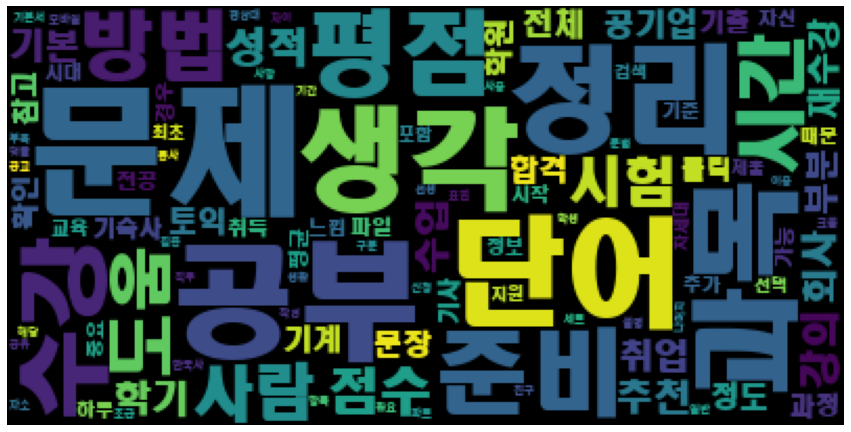

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cloud)

In [29]:
lst = []
for i in tags:
    lst.append(i[0])

In [30]:
lst

['문제',
 '공부',
 '단어',
 '정리',
 '생각',
 '과목',
 '준비',
 '평점',
 '수강',
 '방법',
 '시간',
 '도움',
 '사람',
 '시험',
 '점수',
 '성적',
 '강의',
 '추천',
 '회사',
 '학기',
 '수업',
 '취업',
 '기본',
 '부분',
 '재수강',
 '전체',
 '공기업',
 '토익',
 '문장',
 '정도',
 '학원',
 '합격',
 '기계',
 '확인',
 '참고',
 '기출',
 '클릭',
 '과정',
 '기숙사',
 '기사',
 '경우',
 '평균',
 '전공',
 '파일',
 '가능',
 '취득',
 '자신',
 '시작',
 '하루',
 '기준',
 '느낌',
 '중요',
 '때문',
 '추가',
 '교육',
 '시대',
 '정보',
 '포함',
 '선택',
 '검색',
 '지원',
 '최초',
 '차세대',
 '제출',
 '한국사',
 '구분',
 '사용',
 '경상대',
 '모바일',
 '차이',
 '해당',
 '동사',
 '표현',
 '조금',
 '직무',
 '항목',
 '친구',
 '사항',
 '필요',
 '기간',
 '파트',
 '공유',
 '집중',
 '학생',
 '신청',
 '크롬',
 '기본서',
 '세트',
 '문법',
 '일반',
 '설명',
 '부족',
 '작성',
 '댓글',
 '공고',
 '자소',
 '이용',
 '생활',
 '나머지',
 '선생']

In [31]:
bar_df = pd.DataFrame(tags)

In [32]:
bar_df

,0,1
0,문제,41
1,공부,34
2,단어,29
3,정리,28
4,생각,26
...,...,...
95,자소,5
96,이용,5
97,생활,5
98,나머지,5


In [34]:
# ## 한글 깨짐 해결 코드

# import platform
# from matplotlib import font_manager, rc
# path = "c:/Windows/Fonts/malgun.ttf"
# if platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# else:
#     print('Unknown system... sorry~~~~')

In [33]:
font_manager.FontProperties(fname=path).get_name()

NameError: name 'font_manager' is not defined

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

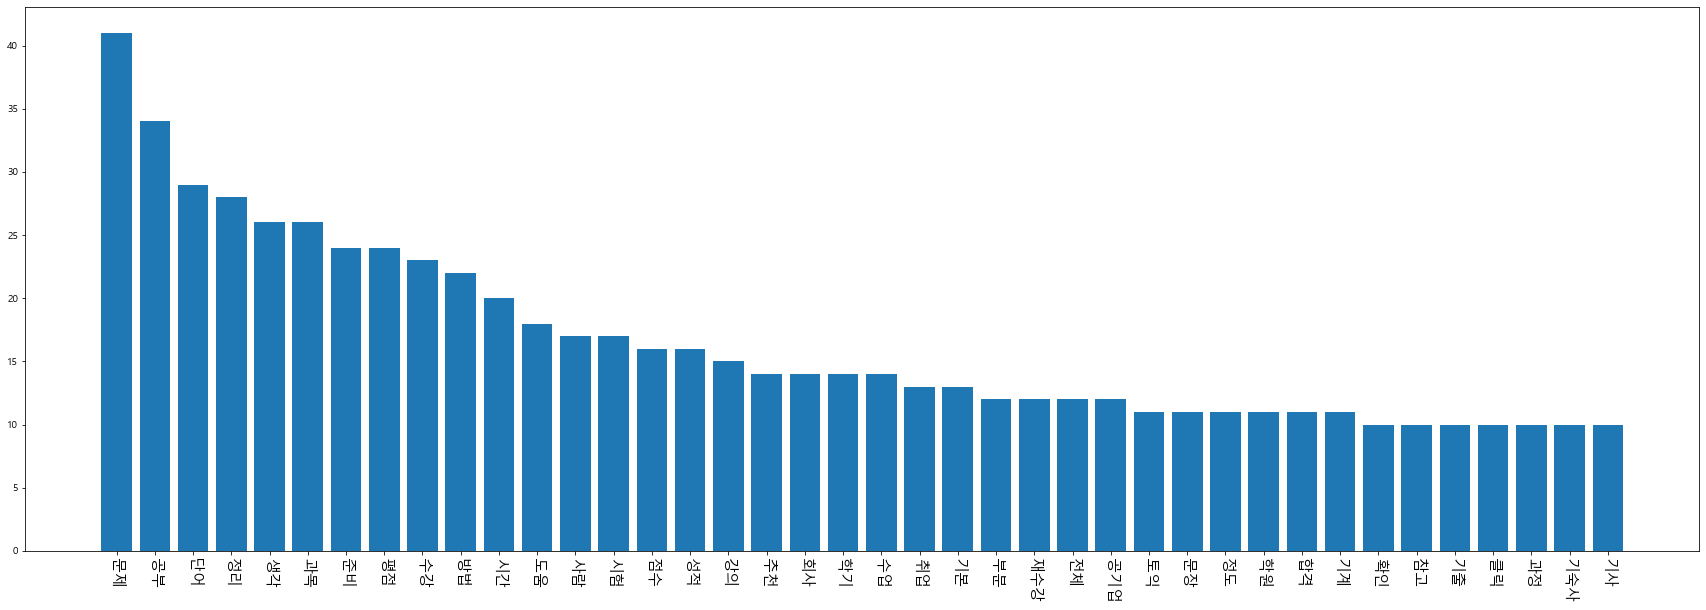

In [35]:
plt.figure(figsize=(30,10))
plt.bar(bar_df.iloc[:40,0],bar_df.iloc[:40,1])
plt.xticks(rotation=270,fontsize=15)
plt.yticks(fontsize = 10)

In [36]:
dictonary = dict()
for i in lst:
    abc = every[every.clean.str.contains(i)]
    a = list(abc[abc.scrape>200].index)
    dictonary[i] = a

In [37]:
list(abc[abc.scrape>200].index)

[17, 257]

In [38]:
list(dictonary.values())

[[0, 17, 33, 89, 168, 208, 257],
 [0, 2, 17, 33, 89, 140, 257],
 [0, 17, 89],
 [0, 9, 17, 33, 89, 129, 131, 159, 257, 280],
 [0, 2, 9, 13, 17, 33, 85, 89, 129],
 [13, 33, 131, 164, 168, 207, 208],
 [6, 9, 17, 33, 131, 257],
 [131],
 [129, 131, 207, 208],
 [0, 9, 13, 33, 140, 164, 168, 207, 208, 320],
 [0, 2, 9, 13, 17, 33, 89, 168, 207],
 [0, 2, 17, 33, 89, 257, 280, 320],
 [0, 6, 33, 89, 164, 280],
 [2, 17, 89, 126, 140, 164, 257],
 [0, 9, 17, 89],
 [17, 33, 131, 168, 207],
 [17, 129, 140, 164, 168, 207, 208],
 [0, 6, 9, 17, 33, 89, 129, 131],
 [9],
 [9, 33, 131, 140],
 [129, 131, 168, 207, 208],
 [9, 33, 131],
 [0, 9, 13, 17, 131, 207],
 [0, 9, 13, 17, 33, 89, 129],
 [131],
 [17, 129, 131],
 [33, 126, 131],
 [0, 17, 33, 89, 320],
 [0, 17, 89],
 [0, 17, 33, 89, 131],
 [0, 17, 33, 89],
 [2, 9, 33],
 [33],
 [9, 89, 129, 164, 168],
 [6, 9, 13, 31, 85, 89, 129, 131, 164, 207],
 [17, 33, 257],
 [13, 140, 164, 234],
 [13, 207, 208],
 [208],
 [33],
 [0, 13, 33, 89, 168, 207],
 [131],
 [33, 1

In [39]:
dictonary

{'문제': [0, 17, 33, 89, 168, 208, 257],
 '공부': [0, 2, 17, 33, 89, 140, 257],
 '단어': [0, 17, 89],
 '정리': [0, 9, 17, 33, 89, 129, 131, 159, 257, 280],
 '생각': [0, 2, 9, 13, 17, 33, 85, 89, 129],
 '과목': [13, 33, 131, 164, 168, 207, 208],
 '준비': [6, 9, 17, 33, 131, 257],
 '평점': [131],
 '수강': [129, 131, 207, 208],
 '방법': [0, 9, 13, 33, 140, 164, 168, 207, 208, 320],
 '시간': [0, 2, 9, 13, 17, 33, 89, 168, 207],
 '도움': [0, 2, 17, 33, 89, 257, 280, 320],
 '사람': [0, 6, 33, 89, 164, 280],
 '시험': [2, 17, 89, 126, 140, 164, 257],
 '점수': [0, 9, 17, 89],
 '성적': [17, 33, 131, 168, 207],
 '강의': [17, 129, 140, 164, 168, 207, 208],
 '추천': [0, 6, 9, 17, 33, 89, 129, 131],
 '회사': [9],
 '학기': [9, 33, 131, 140],
 '수업': [129, 131, 168, 207, 208],
 '취업': [9, 33, 131],
 '기본': [0, 9, 13, 17, 131, 207],
 '부분': [0, 9, 13, 17, 33, 89, 129],
 '재수강': [131],
 '전체': [17, 129, 131],
 '공기업': [33, 126, 131],
 '토익': [0, 17, 33, 89, 320],
 '문장': [0, 17, 89],
 '정도': [0, 17, 33, 89, 131],
 '학원': [0, 17, 33, 89],
 '합격': [2, 9, 3

In [4]:
import networkx as nx

In [40]:
lst = []
for i in dictonary.keys():
    for j in dictonary[i]:
        lst.append((i,j))

In [14]:
# a = '생활관 관생 을 모집 합니다'
# b = '생활관 관생 을 추가 모집 합니다'
# c = '일본 교환학생 을 모집 합니다'
tst = pd.DataFrame([['A','A','A','A','B','B','B','B','B','C','C','C','C'],['생활관','관생','모집','합니다','생활관','관생','추가','모집','합니다','일본','교환학생','모집','합니다']]).T

In [15]:
graph_network_df = pd.DataFrame(lst) ###원래는 lst 들어가야ㅐ됨

In [16]:
graph_network_df.columns = ['source','target']

In [17]:
G = nx.from_pandas_edgelist(graph_network_df, source='source',target='target')

In [18]:
graph_network_df

,source,target
0,A,생활관
1,A,관생
2,A,모집
3,A,합니다
4,B,생활관
5,B,관생
6,B,추가
7,B,모집
8,B,합니다
9,C,일본


In [19]:
print(len(G.nodes()))
print(len(G.edges()))

10
13


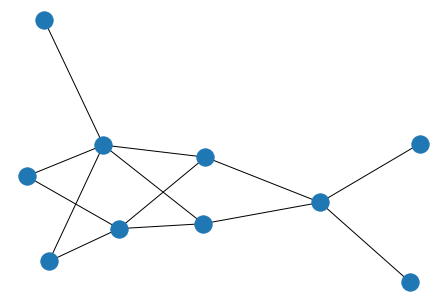

In [20]:
nx.draw(G,font_family='Malgun Gothic')

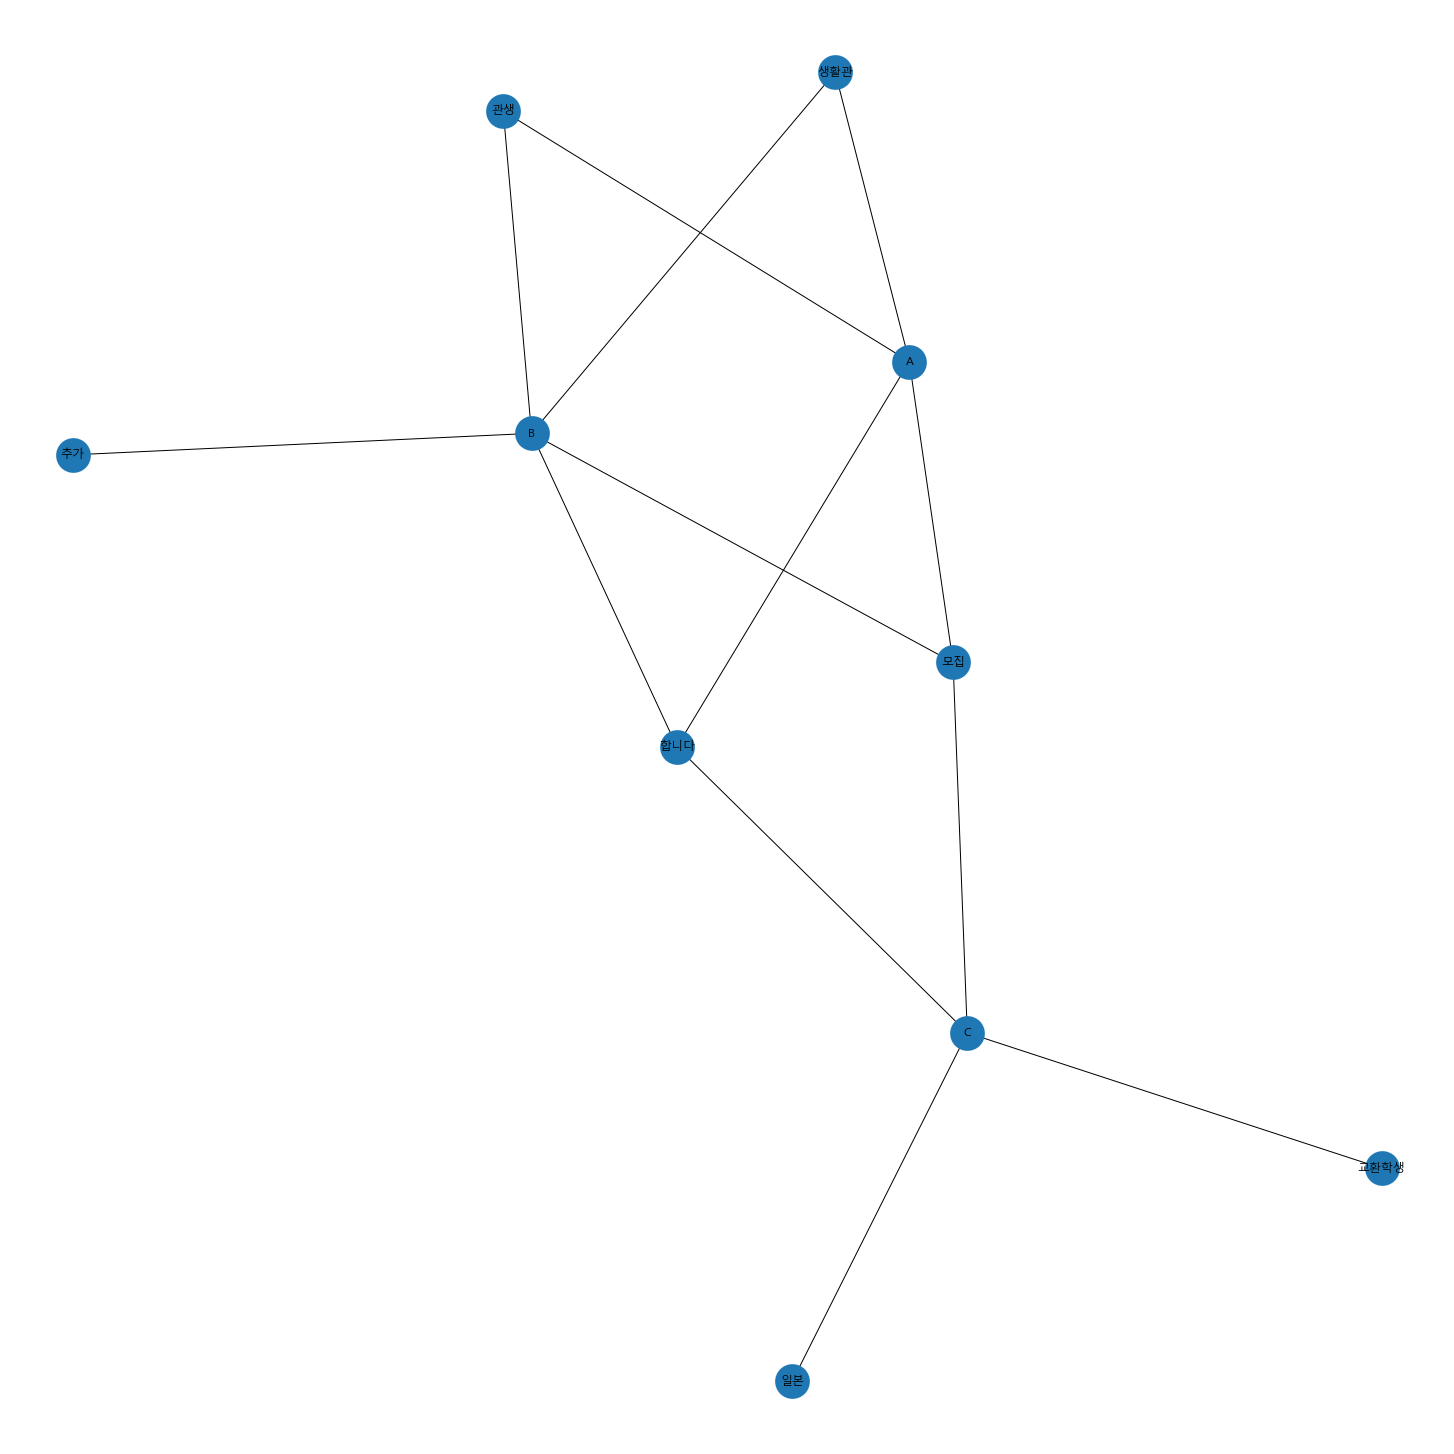

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw_kamada_kawai(G,node_size=1200,linewidths=0.1,font_size=30)
nx.draw_networkx_labels(G,pos,font_family='Malgun Gothic')
plt.savefig('network_version1.png',dpi=300)

In [23]:
check_between = pd.DataFrame([nx.betweenness_centrality(G).keys(),nx.betweenness_centrality(G).values()]).T
check_between.head()

,0,1
0,A,0.162037
1,생활관,0.0138889
2,관생,0.0138889
3,모집,0.222222
4,합니다,0.222222


In [24]:
check_between.sort_values(1,ascending=False).iloc[:30,:]

,0,1
7,C,0.425926
5,B,0.384259
3,모집,0.222222
4,합니다,0.222222
0,A,0.162037
1,생활관,0.0138889
2,관생,0.0138889
6,추가,0
8,일본,0
9,교환학생,0


In [25]:
check_between = pd.DataFrame([nx.degree_centrality(G).keys(),nx.degree_centrality(G).values()]).T
check_between.head()

,0,1
0,A,0.444444
1,생활관,0.222222
2,관생,0.222222
3,모집,0.333333
4,합니다,0.333333


In [26]:
check_between.sort_values(1,ascending=False).iloc[:30,:]

,0,1
5,B,0.555556
0,A,0.444444
7,C,0.444444
3,모집,0.333333
4,합니다,0.333333
1,생활관,0.222222
2,관생,0.222222
6,추가,0.111111
8,일본,0.111111
9,교환학생,0.111111


In [87]:
### between centrality 33, 0 , 131, 89, 9
every.iloc[[33,0,89,9,17,131,129,207,208,13,168,164,257],:]

,days,like,daegle,scrape,context,clean
33,21/07/28 19:54,178,67,410,"공기업 합격수기!!! 공기업 취업했습니다!, , 한국가스기술공사 기계직 최종합격했습...",공기업 합격수기 공기업 취업했습니다 한국가스기술공사 기계직 최종 합격했습니다 공기업...
0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
89,21/07/12 22:02,108,7,305,토익 LC 공략법 LC는 시험 때 말고 푼 적이 별로 없다보니 노력해서 점수 올린 ...,토익 공략법은 시험 때 말고 푼 적이 별로 없다 보니 노력해서 점수 올린 사람들의 ...
9,21/08/14 18:04,283,18,1205,"⭐취린이를 위한 취업 준비 시작 방법 정리⭐ 당장에 취업을 준비해야 하는데,, 어떻...",취리 나이를 위한 취업 준비 시작 방법 정리 당장에 취업을 준비해야 하는데 어떻게 ...
17,21/10/20 16:01,222,47,491,"[655->835] 🍒토익 2달 공부 후기🍒feat 국제어학원 강의, 그 외 독학 ...",토익 공부 후기 국제어학원 강의 그 외 독학 안녕하세요 토익 준비하시는 학우 여러분...
131,21/05/10 13:32,227,37,1018,재수강하려는 친구들아 ! 참고해 ! 1학년 2학기에 D+받은 과목 2학년 2학기에 ...,재수강하려는 친구들아 참고해 받은 과목 받고 듣고 들어서 정리하면 재수강했으니 최초...
129,21/03/01 16:09,242,29,387,"핑프 답답해서 내가 정리했다 댓글로 추가할거 있음 적어봐, 그럼 내가 정리해서 생각...",핑크 답답해서 내가 정리했다 댓글로 추가할 거 있음 적어봐 그럼 내가 정리해서 생각...
207,21/01/26 14:42,108,42,559,"지나가던 4학년입니다 ~! 시간표 조회는 어디서? 경상대학교 정보나눔터 - 수강,강...",지나가던 시간표 조회는 어디서 경상대학교 정보 나눔터 수강 강의평가 성적 메뉴에서 ...
208,21/01/27 00:37,108,15,743,"tmi) 내가 올렸던 게시글들... , 진짜 많네요., , 0. 에타 핑프가 되지 ...",내가 올렸던 게시글들 진짜 많네요 에타 핑크가 되지 않는 방법에 타 검색 기능 수업...
13,21/07/27 21:08,255,29,897,"자필 서명을 한글 파일에 넣어보자! 안녕 경상대학우분들, , 최근에 비대면 때문에 ...",자필 서명을 한글 파일에 넣어보자 안녕 경상대 학우분들 최근에 비대면 때문에 문서 ...


In [93]:
sentencess = []
for i in every.iloc[[33,0,131,89,9],:].context:
    sentencess.append(kss.split_sentences(i)[:3])

In [105]:
sentencess[0][2]

'게임에서 퀘스트를 깬다는 생각으로 취업이라는 퀘스트에 한발씩 다가간다는 생각으로 즐기세요!, 올해부터는 공기업 대부분이 서류배수가 생겨 쌍기사가 선택이 아닌 필수가 되었습니다.'

In [106]:
every.iloc[[33,0,131,89,9],:]

,days,like,daegle,scrape,context,clean
33,21/07/28 19:54,178,67,410,"공기업 합격수기!!! 공기업 취업했습니다!, , 한국가스기술공사 기계직 최종합격했습...",공기업 합격수기 공기업 취업했습니다 한국가스기술공사 기계직 최종 합격했습니다 공기업...
0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
131,21/05/10 13:32,227,37,1018,재수강하려는 친구들아 ! 참고해 ! 1학년 2학기에 D+받은 과목 2학년 2학기에 ...,재수강하려는 친구들아 참고해 받은 과목 받고 듣고 들어서 정리하면 재수강했으니 최초...
89,21/07/12 22:02,108,7,305,토익 LC 공략법 LC는 시험 때 말고 푼 적이 별로 없다보니 노력해서 점수 올린 ...,토익 공략법은 시험 때 말고 푼 적이 별로 없다 보니 노력해서 점수 올린 사람들의 ...
9,21/08/14 18:04,283,18,1205,"⭐취린이를 위한 취업 준비 시작 방법 정리⭐ 당장에 취업을 준비해야 하는데,, 어떻...",취리 나이를 위한 취업 준비 시작 방법 정리 당장에 취업을 준비해야 하는데 어떻게 ...


In [2]:
import numpy as np
a = np.array([[0,0,-0.28768,-0.28769,-0.28768,0,0,0],[0,0,-0.28768,-0.28768,-0.2768,0.40547,0,0],[0,0,-0.28768,-0.28768,-0.28768,0,0.40547,0.40547]])

In [3]:
a @ a.T

array([[0.2482851 , 0.24515227, 0.24828222],
       [0.24515227, 0.40654373, 0.24514939],
       [0.24828222, 0.24514939, 0.57709119]])